## Raciocínio por trás da Regressão Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Criando um dataset
class_1 = np.random.random(20)*2 + 1
class_2 = np.random.random(20)*2 + 0.5

In [6]:
# Retirando uma amostra do dataset
data = pd.DataFrame()
data['x'] = np.concatenate([class_1, class_2])
data['y'] = [0]*20 + [1]*20 # listas com 0 e 1
data = data.sample(frac = 1)

In [9]:
data.head()

,x,y
24,0.555062,1
33,2.203447,1
3,2.391583,0
1,1.395798,0
2,1.118957,0


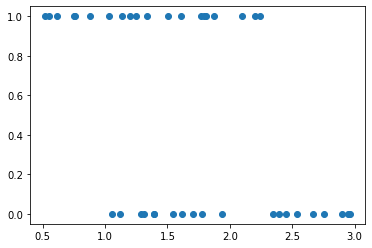

In [11]:
# Temos uma distribuição categórica: 0 e 1
plt.scatter(data['x'], data['y']);

In [14]:
# Calcular a verossimilhança (likelihood)
def gradient_likelihood(curr_betas, data):
    # função logística
    exp_num = np.exp(curr_betas[0] + curr_betas[1]*data['x'])
    prob = exp_num/(1+exp_num)
    
    # d(LL)/db0 e d(LL)/db1, calcular isso na mão
    partial_0 = np.sum(data['y'] - prob)
    partial_1 = np.sum((data['y'] - prob)*data['x'])
    
    return np.array([partial_0, partial_1])

In [ ]:
# Condições iniciais
curr_betas = np.array([0.0,0.0])
diff = np.inf
eta = 0.1

while diff > 10:
    grad = gradient_likelihood(curr_betas, data) # retorna a partial_0 e partial_1
    diff = abs(grad).sum() # Soma das parciais
    curr_betas += eta*grad # 0.1*partial_0, 0.1*partial_1
    
print(curr_betas)

In [ ]:
plt.scatter(data['x'], data['y'])

x_vals = np.arange(data['x'].min(), data['x'].max(), 0.01)
p_vals = 1/(1+np.exp(-(curr_betas[0] + curr_betas[1]*x_vals)))
plt.plot(x_vals, p_vals);

### Utilizando a biblioteca scikitlearn

In [23]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression(penalty = 'none')
clf.fit(np.array(data['x']).reshape(-1,1), data['y'])
print(f"beta_0: {clf.intercept_[0]}")
print(f"beta_1: {clf.coef_[0][0]}")

beta_0: 2.889767804844235
beta_1: -1.7400036666669394


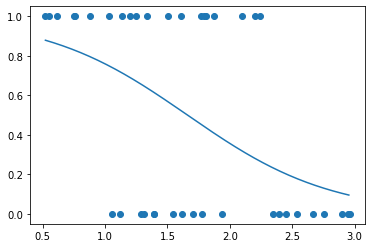

In [37]:
plt.scatter(data['x'], data['y'])

x_vals = np.arange(data['x'].min(), data['x'].max(), 0.01)
p_vals = 1/(1+np.exp(-(clf.intercept_[0] + clf.coef_[0][0]*x_vals)))
plt.plot(x_vals, p_vals);